## Observations and Insights 

There is a strong correlation between a mouse's weight and the average size of their tumor. The larger the mouse, the larger their tumor is likely to be.

There was only one outlier in the Capomulin, Ramicane, Infubinol, and Ceftamin datasets indicating there was a high level of consistency in how the tumors responded to treatments during the study.

There is an even distribution of mice for the various treatment methods as well as an even distribution of mouse sex throughout the study.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_mouse_df = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="inner")
# Display the data table for preview
comb_mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(comb_mouse_df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#use .duplicated to look for where Mouse ID and Timepoint are repeated. Keep the first row in each duplication
dupes = comb_mouse_df.duplicated(subset = ["Mouse ID","Timepoint"],keep = "first")

#create a new dataframe of just the duplicated data. Pass the dupe variable as a boolean series to the combined mouse dataframe. 
#Pandas calls this boolean indexing

duplicate_mice = comb_mouse_df[dupes]

#print all unique mouse IDs from the dataframe of duplicate mice
duplicate_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

dupes = comb_mouse_df.duplicated(subset = ["Mouse ID","Timepoint"],keep = False)
comb_mouse_df[dupes]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
comb_mouse_df = comb_mouse_df.loc[comb_mouse_df["Mouse ID"] != "g989",:]
comb_mouse_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(comb_mouse_df["Mouse ID"].unique())

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
group_by_regimen = comb_mouse_df.groupby(["Drug Regimen"])

mean_tumor = round(group_by_regimen["Tumor Volume (mm3)"].mean(),3)
median_tumor = round(group_by_regimen["Tumor Volume (mm3)"].median(),3)
variance_tumor = round(group_by_regimen["Tumor Volume (mm3)"].var(),3)
std_tumor = round(group_by_regimen["Tumor Volume (mm3)"].std(),3)
sem_tumor = round(group_by_regimen["Tumor Volume (mm3)"].sem(),3)

summary_groupby_df = pd.DataFrame({
    "Mean Tumor Volume (mm3)":mean_tumor,
    "Median Tumor Volume (mm3)":median_tumor,
    "Variance":variance_tumor,
    "Standard Deviation":std_tumor,
    "SEM":sem_tumor
})
summary_groupby_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

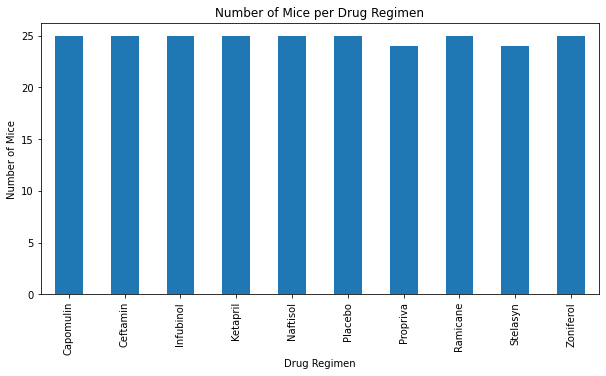

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#Keep only one instance of each mouse
deduped_mice = comb_mouse_df.drop_duplicates(subset = ["Mouse ID"],keep="last")

#Group the mice by Drug and count how many ID's per
mice_groups = deduped_mice.groupby(["Drug Regimen"])

mice_count = mice_groups["Mouse ID"].count()

#Create the Chart using the mice count series just created
mouse_chart = mice_count.plot(kind = "bar",figsize=(10,5))

mouse_chart.set_ylabel("Number of Mice")
mouse_chart.set_title("Number of Mice per Drug Regimen")

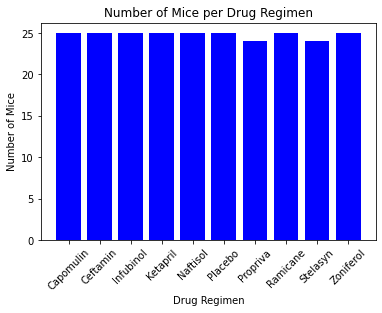

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Dataframe the mice count series so you can call each data set separately
mice_count_df = pd.DataFrame(mice_count)

#Reset the index so you can use the Drug Regimen column in your plot
mice_count_df = mice_count_df.reset_index()

#Create the chart
x_axis = mice_count_df["Drug Regimen"]
y_axis = mice_count_df["Mouse ID"]
plt.bar(x_axis,y_axis,color="b")
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=45)
plt.show()

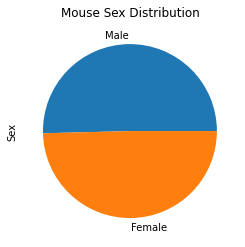

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = deduped_mice["Sex"].value_counts()

plot_mouse_gender = mice_gender.plot(kind="pie",title="Mouse Sex Distribution")
plot_mouse_gender

<function matplotlib.pyplot.show(*args, **kw)>

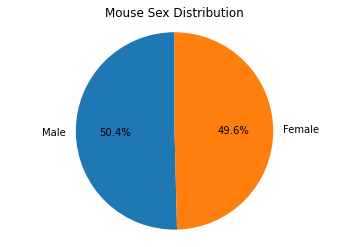

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]

plt.pie(mice_gender,labels=labels,autopct="%1.1f%%",startangle=90)
plt.title("Mouse Sex Distribution")
plt.axis("equal")
plt.show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
groupby_mice = comb_mouse_df.groupby(["Mouse ID"]) 
indiv_max_timepoint = groupby_mice["Timepoint"].max()
indiv_max_timepoint_df = pd.DataFrame(indiv_max_timepoint)
indiv_max_timepoint_df = indiv_max_timepoint_df.rename(columns={"Timepoint":"Last Timepoint"})
indiv_max_timepoint_df = indiv_max_timepoint_df.reset_index()   
indiv_max_timepoint_df.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_df = pd.merge(comb_mouse_df,indiv_max_timepoint_df,on="Mouse ID",how="left")
#.head()
final_tumor_volumes_df = combined_df.loc[combined_df["Timepoint"] == combined_df["Last Timepoint"]]
final_tumor_volumes_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1849,z435,Propriva,Female,12,26,10,48.710661,0,10
1859,z581,Infubinol,Female,24,25,45,62.754451,3,45
1869,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_dict = {
    "Capomulin":[],
    "Ramicane":[],
    "Infubinol":[],
    "Ceftamin":[]
}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_locations = final_tumor_volumes_df.loc[final_tumor_volumes_df["Drug Regimen"] == "Capomulin"]
capomulin_quartiles = capomulin_locations["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

ramicane_locations = final_tumor_volumes_df.loc[final_tumor_volumes_df["Drug Regimen"] == "Ramicane"]
ramicane_quartiles = ramicane_locations["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
ramicane_lowerq = ramicane_quartiles[.25]
ramicane_upperq = ramicane_quartiles[.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq

infubinol_locations = final_tumor_volumes_df.loc[final_tumor_volumes_df["Drug Regimen"] == "Infubinol"]
infubinol_quartiles = infubinol_locations["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
infubinol_lowerq = infubinol_quartiles[.25]
infubinol_upperq = infubinol_quartiles[.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq

ceftamin_locations = final_tumor_volumes_df.loc[final_tumor_volumes_df["Drug Regimen"] == "Ceftamin"]
ceftamin_quartiles = ceftamin_locations["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
ceftamin_lowerq = ceftamin_quartiles[.25]
ceftamin_upperq = ceftamin_quartiles[.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    for index, row in final_tumor_volumes_df.iterrows():
        if row[1] == treatment:
            tumor_volume_dict[treatment].append(row[6])       
    
#Determine outliers using upper and lower bounds
capomulin_lower_bound = round(capomulin_lowerq - 1.5*capomulin_iqr,3)
capomulin_upper_bound = round(capomulin_upperq + 1.5*capomulin_iqr ,3)  

ramicane_lower_bound = round(ramicane_lowerq - 1.5*ramicane_iqr,3)
ramicane_upper_bound = round(ramicane_upperq + 1.5*ramicane_iqr,3)

infubinol_lower_bound = round(infubinol_lowerq - 1.5*infubinol_iqr,3)
infubinol_upper_bound = round(infubinol_upperq + 1.5*infubinol_iqr,3)

ceftamin_lower_bound = round(ceftamin_lowerq - 1.5*ceftamin_iqr,3)
ceftamin_upper_bound = round(ceftamin_upperq + 1.5*ceftamin_iqr,3)

print(f"For mice treated with Capomulin, final Tumor Volumes lower than {capomulin_lower_bound} and higher than {capomulin_upper_bound} are outliers")
print(f"For mice treated with Ramicane, final Tumor Volumes lower than {ramicane_lower_bound} and higher than {ramicane_upper_bound} are outliers")
print(f"For mice treated with Infubinol, final Tumor Volumes lower than {infubinol_lower_bound} and higher than {infubinol_upper_bound} are outliers")
print(f"For mice treated with Ceftamin, final Tumor Volumes lower than {ceftamin_lower_bound} and higher than {ceftamin_upper_bound} are outliers")


For mice treated with Capomulin, final Tumor Volumes lower than 20.705 and higher than 51.832 are outliers
For mice treated with Ramicane, final Tumor Volumes lower than 17.913 and higher than 54.307 are outliers
For mice treated with Infubinol, final Tumor Volumes lower than 36.833 and higher than 82.741 are outliers
For mice treated with Ceftamin, final Tumor Volumes lower than 25.355 and higher than 87.666 are outliers


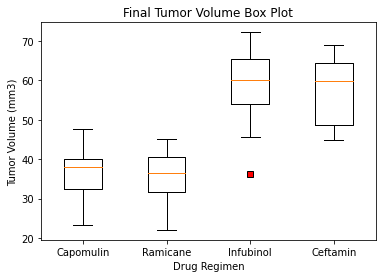

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol_to_chart = pd.DataFrame(tumor_volume_dict)
capomulin_data = tumor_volume_dict["Capomulin"]
ramicane_data = tumor_volume_dict["Ramicane"]
infubinol_data = tumor_volume_dict["Infubinol"]
ceftamin_data = tumor_volume_dict["Ceftamin"]
red_square = dict(markerfacecolor="r",marker="s")
plt.boxplot([capomulin_data,ramicane_data,infubinol_data,ceftamin_data],labels=treatments,flierprops=red_square)
plt.title("Final Tumor Volume Box Plot")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.show()


## Line and Scatter Plots

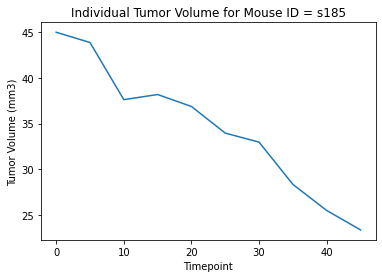

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_id = "s185"

x_timepoint = comb_mouse_df.loc[comb_mouse_df["Mouse ID"]==mouse_id,["Timepoint"]]
y_tumor = comb_mouse_df.loc[comb_mouse_df["Mouse ID"]==mouse_id,["Tumor Volume (mm3)"]]

plt.plot(x_timepoint,y_tumor)
plt.title(f"Individual Tumor Volume for Mouse ID = {mouse_id}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

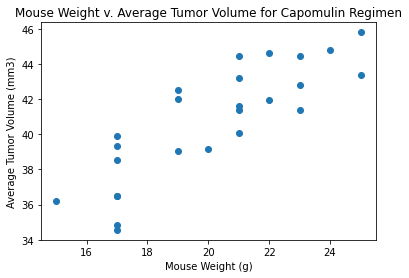

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mice = comb_mouse_df.loc[comb_mouse_df["Drug Regimen"]=="Capomulin"]
capomulin_mice_groups = capomulin_mice.groupby("Mouse ID")
capomulin_weights = capomulin_mice_groups["Weight (g)"].first()
capomulin_tumor_avg = capomulin_mice_groups["Tumor Volume (mm3)"].mean()
capomulin_chart_df = pd.DataFrame({
    "Individual Mouse Weight":capomulin_weights,
    "Average Tumor Weight":capomulin_tumor_avg
})
x_cap_weight = capomulin_chart_df["Individual Mouse Weight"]
y_cap_vol = capomulin_chart_df["Average Tumor Weight"]
plt.scatter(x_cap_weight,y_cap_vol)
plt.title("Mouse Weight v. Average Tumor Volume for Capomulin Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.show()

## Correlation and Regression

The linear regression model is y=0.95x + 21.55
The r-value is 0.84


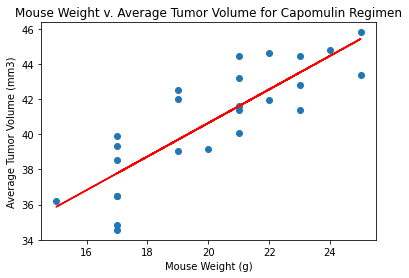

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_cap_weight,y_cap_vol)
line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}")
print("The r-value is " + str(round(rvalue,2)))

regress_values = x_cap_weight * slope + intercept
plt.scatter(x_cap_weight,y_cap_vol)
plt.plot(x_cap_weight,regress_values,"r-")
plt.title("Mouse Weight v. Average Tumor Volume for Capomulin Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.show()